In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale


In [2]:
import importlib
importlib.reload(utils)
savepath = 'ana_action_plan_dimentionality_report_1d'

# One dot 

In [3]:
filename = utils.Save.savepath('ana_action_plan_dimentionality', 'one_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group['dim'] = 1-df_all_group['dim']
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()

df_all_group = df_all_group.rename(columns={'actual control': 'actual_control', 'angular bias': 'angular_bias'})


df_all_group['actual_control'] = df_all_group['actual_control'].astype('category')
df_all_group['angular_bias'] = df_all_group['angular_bias'].astype('category')


In [4]:
%load_ext rpy2.ipython

In [5]:
%R -i df_all_group
%R print(df_all_group)

    group participant actual_control angular_bias       dim
0       H  K-Reg-H-10            0.3            0 0.7612254
1       H  K-Reg-H-10            0.3           90 0.7342819
2       H  K-Reg-H-10           0.55            0 0.7796978
3       H  K-Reg-H-10           0.55           90 0.7093114
4       H  K-Reg-H-10            0.8            0 0.7700181
5       H  K-Reg-H-10            0.8           90 0.6362333
6       H  K-Reg-H-11            0.3            0 0.6967159
7       H  K-Reg-H-11            0.3           90 0.6807774
8       H  K-Reg-H-11           0.55            0 0.7420175
9       H  K-Reg-H-11           0.55           90 0.6948019
10      H  K-Reg-H-11            0.8            0 0.7544203
11      H  K-Reg-H-11            0.8           90 0.6738992
12      H  K-Reg-H-12            0.3            0 0.7648282
13      H  K-Reg-H-12            0.3           90 0.7504204
14      H  K-Reg-H-12           0.55            0 0.7529633
15      H  K-Reg-H-12           0.55    

/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "actual_control". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "angular_bias". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.


            0.8            0 0.7546483
137     H   K-Reg-H-7            0.8           90 0.7007751
138     H   K-Reg-H-8            0.3            0 0.6893335
139     H   K-Reg-H-8            0.3           90 0.7337113
140     H   K-Reg-H-8           0.55            0 0.7588849
141     H   K-Reg-H-8           0.55           90 0.7273165
142     H   K-Reg-H-8            0.8            0 0.7955970
143     H   K-Reg-H-8            0.8           90 0.7468627
144     H   K-Reg-H-9            0.3            0 0.6772044
145     H   K-Reg-H-9            0.3           90 0.7196659
146     H   K-Reg-H-9           0.55            0 0.7257873
147     H   K-Reg-H-9           0.55           90 0.7095020
148     H   K-Reg-H-9            0.8            0 0.7351917
149     H   K-Reg-H-9            0.8           90 0.7167642
150     S   K-Reg-S-1            0.3            0 0.7602792
151     S   K-Reg-S-1            0.3           90 0.7548608
152     S   K-Reg-S-1           0.55            0 0.7744411
1

,group,participant,actual_control,angular_bias,dim
0,H,K-Reg-H-10,0.3,0,0.761225
1,H,K-Reg-H-10,0.3,90,0.734282
2,H,K-Reg-H-10,0.55,0,0.779698
3,H,K-Reg-H-10,0.55,90,0.709311
4,H,K-Reg-H-10,0.8,0,0.770018
...,...,...,...,...,...
295,S,Reg-S-5,0.3,90,0.667585
296,S,Reg-S-5,0.55,0,0.741649
297,S,Reg-S-5,0.55,90,0.706172
298,S,Reg-S-5,0.8,0,0.768821


## Three-way anova

In [6]:
%%R
library(rstatix)
library(emmeans)
library(dplyr)
library(tidyr)
model <- anova_test(df_all_group, dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    between = group,
                    detailed = TRUE)

model
# anova_summary(model)
# emmeans_test(df_all_group, dim~actual_control)

# emmeans(model, ~ actual_control * angular_bias | group, adjust = "tukey")


R[write to console]: 
Attaching package: ‘rstatix’


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ANOVA Table (type II tests)

$ANOVA
                             Effect DFn DFd        SSn   SSd         F        p
1                       (Intercept)   1  48 153.466000 0.605 12171.607 2.09e-59
2                             group   1  48   0.040000 0.605     3.162 8.20e-02
3                    actual_control   2  96   0.000989 0.062     0.762 4.70e-01
4                      angular_bias   1  48   0.003000 0.052     2.735 1.05e-01
5              group:actual_control   2  96   0.006000 0.062     4.469 1.40e-02
6                group:angular_bias   1  48   0.001000 0.052     1.057 3.09e-01
7       actual_control:angular_bias   2  96   0.000588 0.033     0.858 4.27e-01
8 group:actual_control:angular_bias   2  96   0.003000 0.033     4.890 1.00e-02
  p<.05      ges
1     * 0.995000
2       0.050000
3       0.001000
4       0.004000
5     * 0.008000
6       0.002000
7       0.000781
8     * 0.004000

$`Mauchly's Test for Sphericity`
                             Effect     W        p p<.05


## two way-simple anova

### Health group

In [7]:
%%R
model <- anova_test(df_all_group %>% group_by(group), dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    detailed = TRUE)

print("---------------------------------- Health ----------------------------------")
print(model[[1, 2]])



[1] "---------------------------------- Health ----------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd    SSn   SSd         F        p p<.05
1                 (Intercept)   1  24 79.227 0.125 15162.227 3.92e-35     *
2              actual_control   2  48  0.005 0.033     3.903 2.70e-02     *
3                angular_bias   1  24  0.004 0.021     4.517 4.40e-02     *
4 actual_control:angular_bias   2  48  0.003 0.019     4.221 2.00e-02     *
    ges
1 0.998
2 0.026
3 0.019
4 0.017

$`Mauchly's Test for Sphericity`
                       Effect     W        p p<.05
1              actual_control 0.475 0.000191     *
2 actual_control:angular_bias 0.878 0.225000      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.656 1.31, 31.47 0.047         * 0.678
2 actual_control:angular_bias 0.892  1.78, 42.8 0.025         * 0.958
       DF[HF] p[HF] p[HF]<.05


### Patient group

In [8]:
%%R
print("---------------------------------- Patient ---------------------------------")
print(model[[2, 2]])

[1] "---------------------------------- Patient ---------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd       SSn   SSd        F        p p<.05
1                 (Intercept)   1  24 74.280000 0.480 3715.495 7.90e-28     *
2              actual_control   2  48  0.001000 0.030    1.206 3.08e-01      
3                angular_bias   1  24  0.000214 0.032    0.163 6.90e-01      
4 actual_control:angular_bias   2  48  0.000578 0.014    1.006 3.73e-01      
       ges
1 0.993000
2 0.003000
3 0.000386
4 0.001000

$`Mauchly's Test for Sphericity`
                       Effect     W     p p<.05
1              actual_control 0.677 0.011     *
2 actual_control:angular_bias 0.964 0.658      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.756 1.51, 36.29 0.300           0.796
2 actual_control:angular_bias 0.966 1.93, 46.35 0.371           1.048
      DF[HF] p

## simple main effect

# Plot

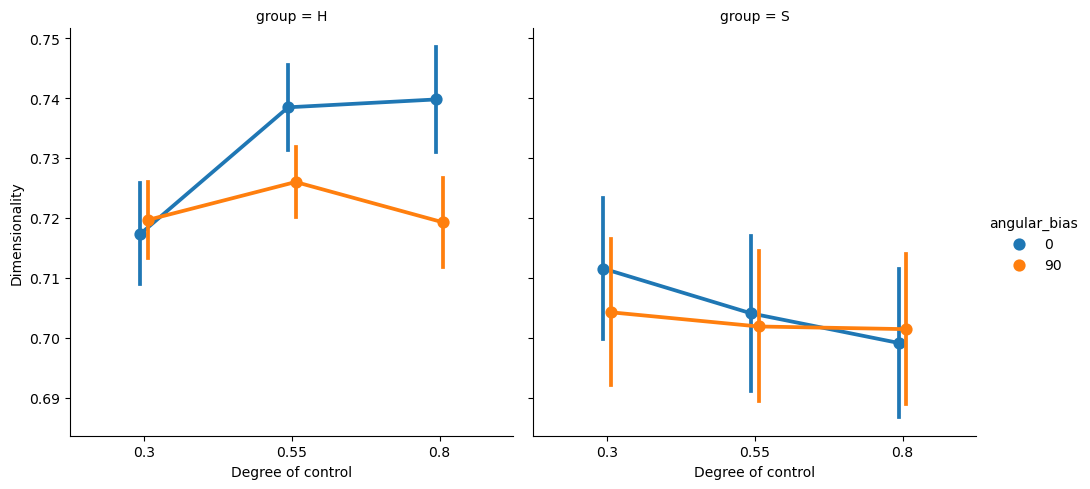

In [4]:
p = sns.catplot(x='actual_control', y='dim', hue='angular_bias', col='group', data=df_all_group, kind='point', errorbar='se', dodge=True)
p.set_axis_labels("Degree of control", "Dimensionality")


In [ ]:
filepaths = utils.Save.savepath(savepath, 'dimentionality.pdf')
p.savefig(filepaths)

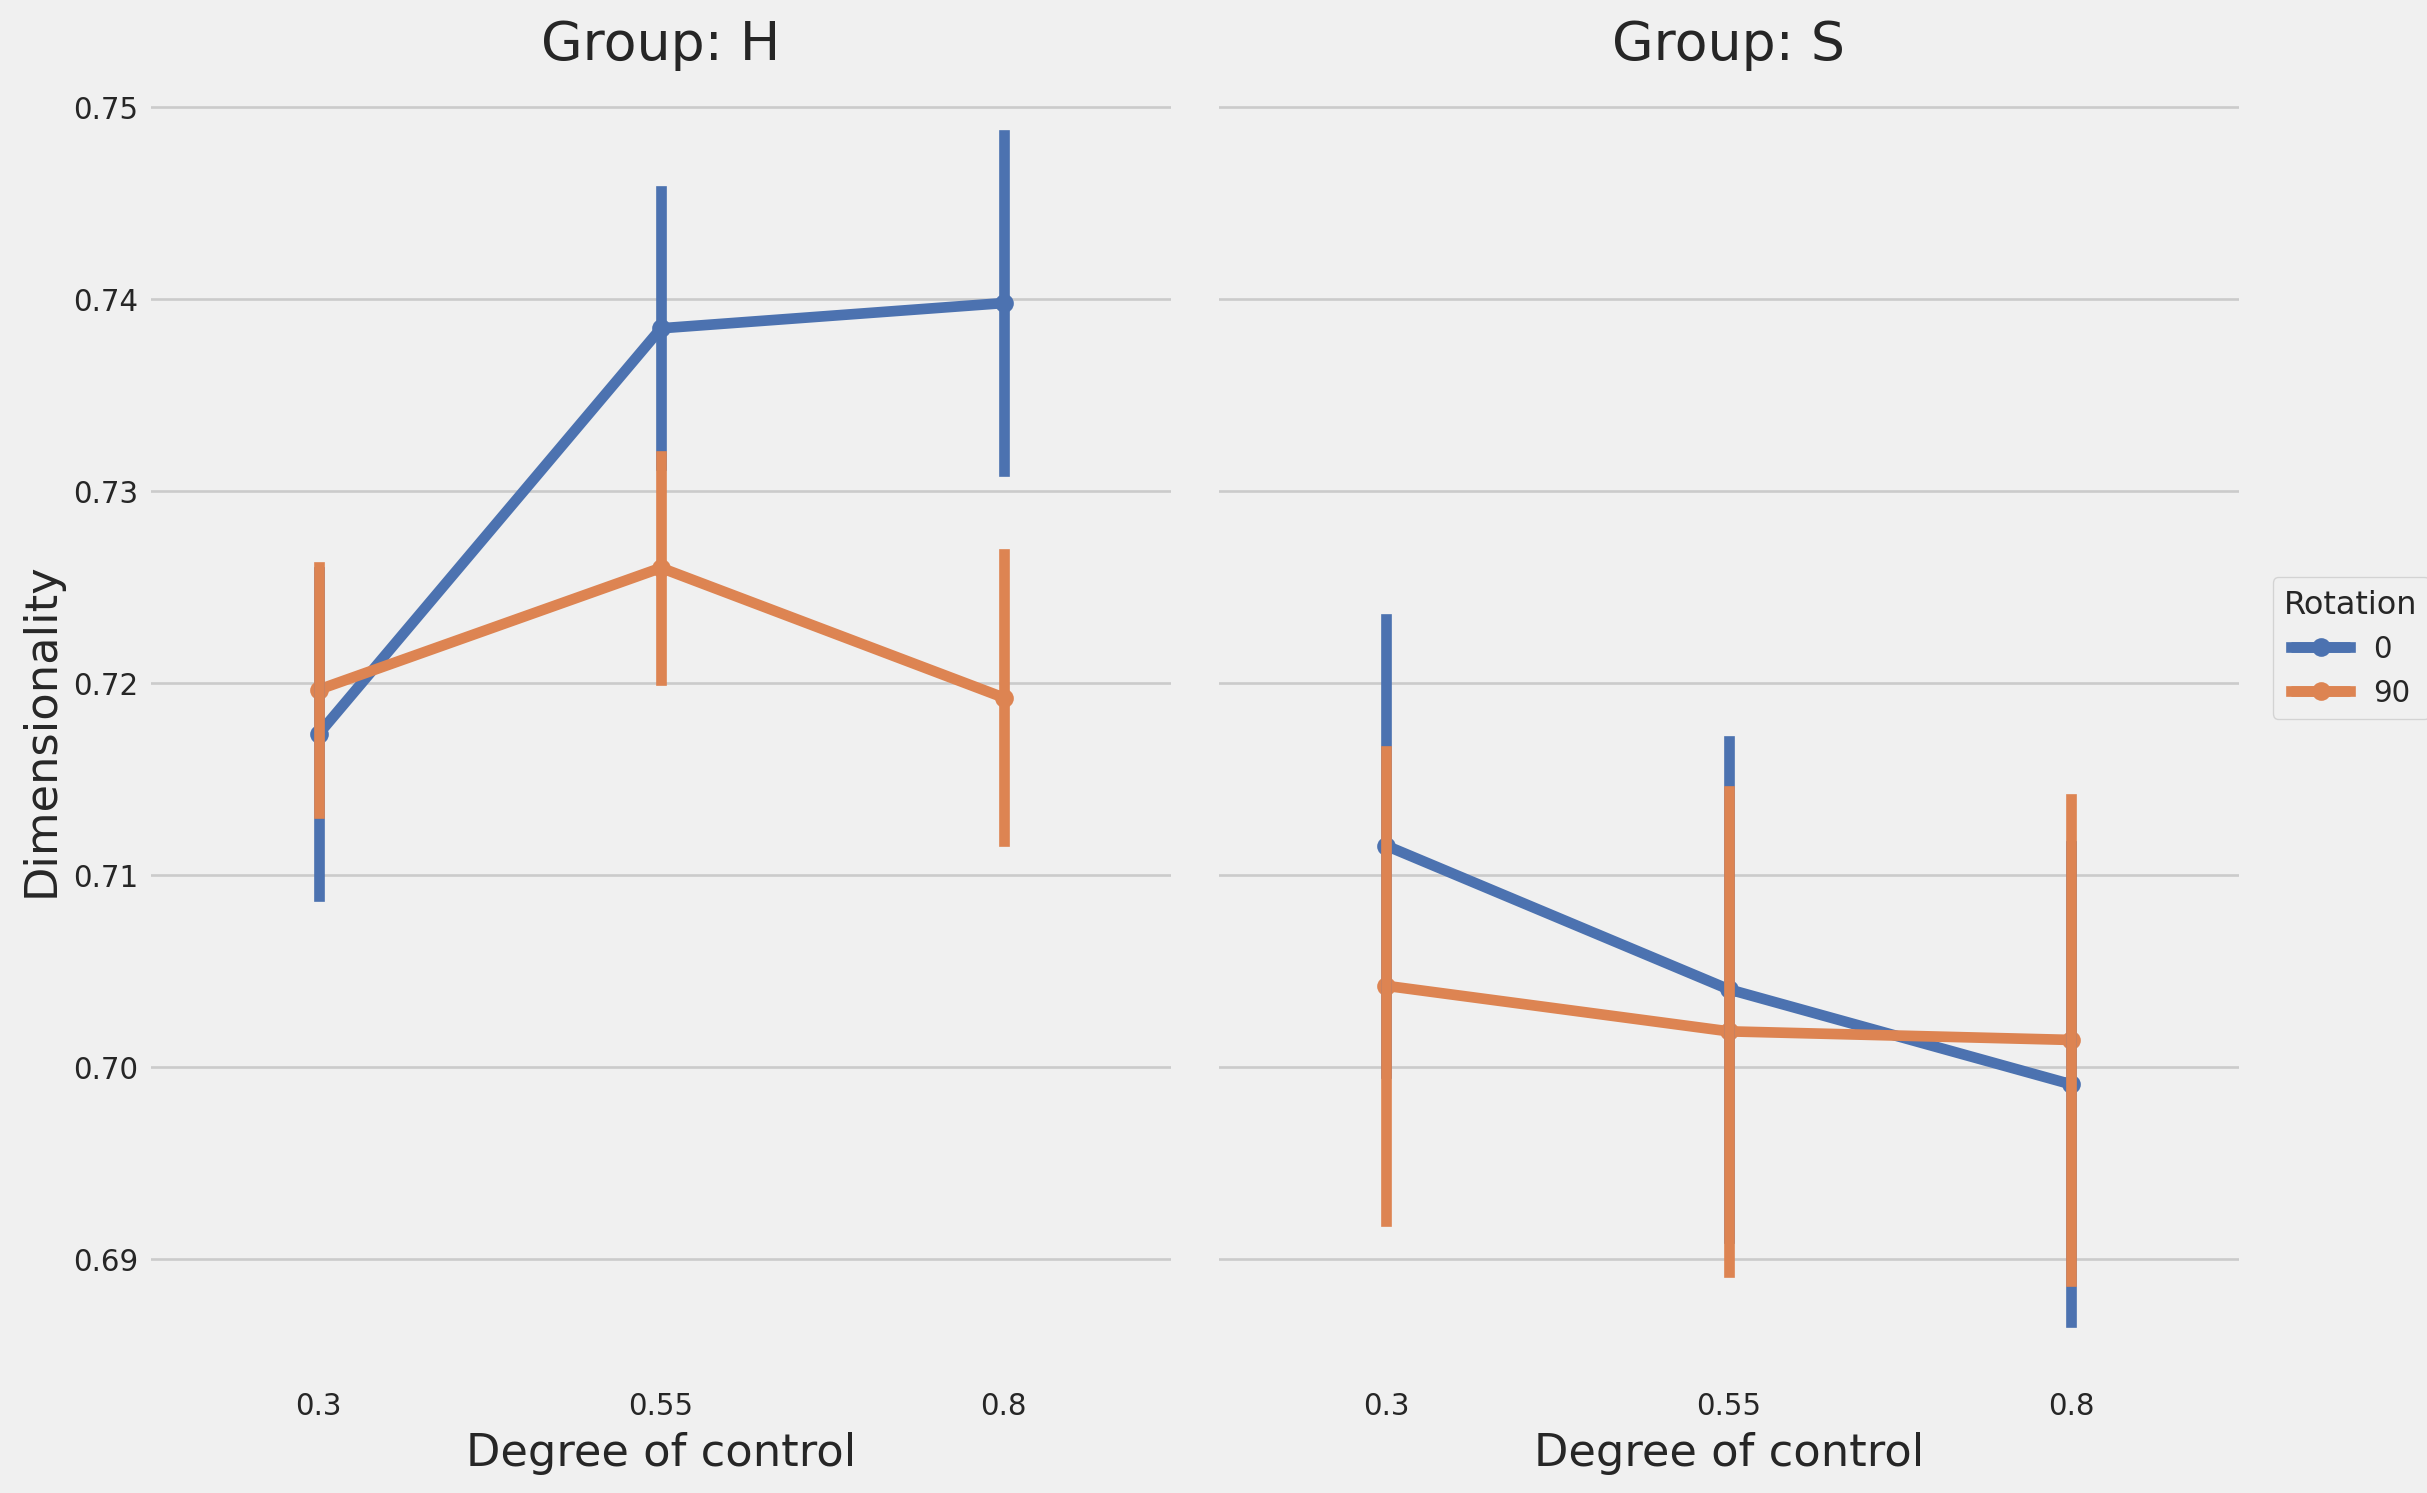

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style 

plt.style.use('default')
p = (
        so.Plot(df_all_group, x="actual_control", y="dim", color="angular_bias")
        .facet("group")
        .add(so.Line(marker="o"), so.Agg())
        .theme({**style.library['fivethirtyeight']})
        .scale(color="deep")
        .add(so.Range(), so.Est(errorbar="se"))
        .layout(size=(12, 8))
        .label(x="Degree of control", y="Dimensionality", col="Group:", color="Rotation")
        
    )
# sns.set_style("whitegrid")
p

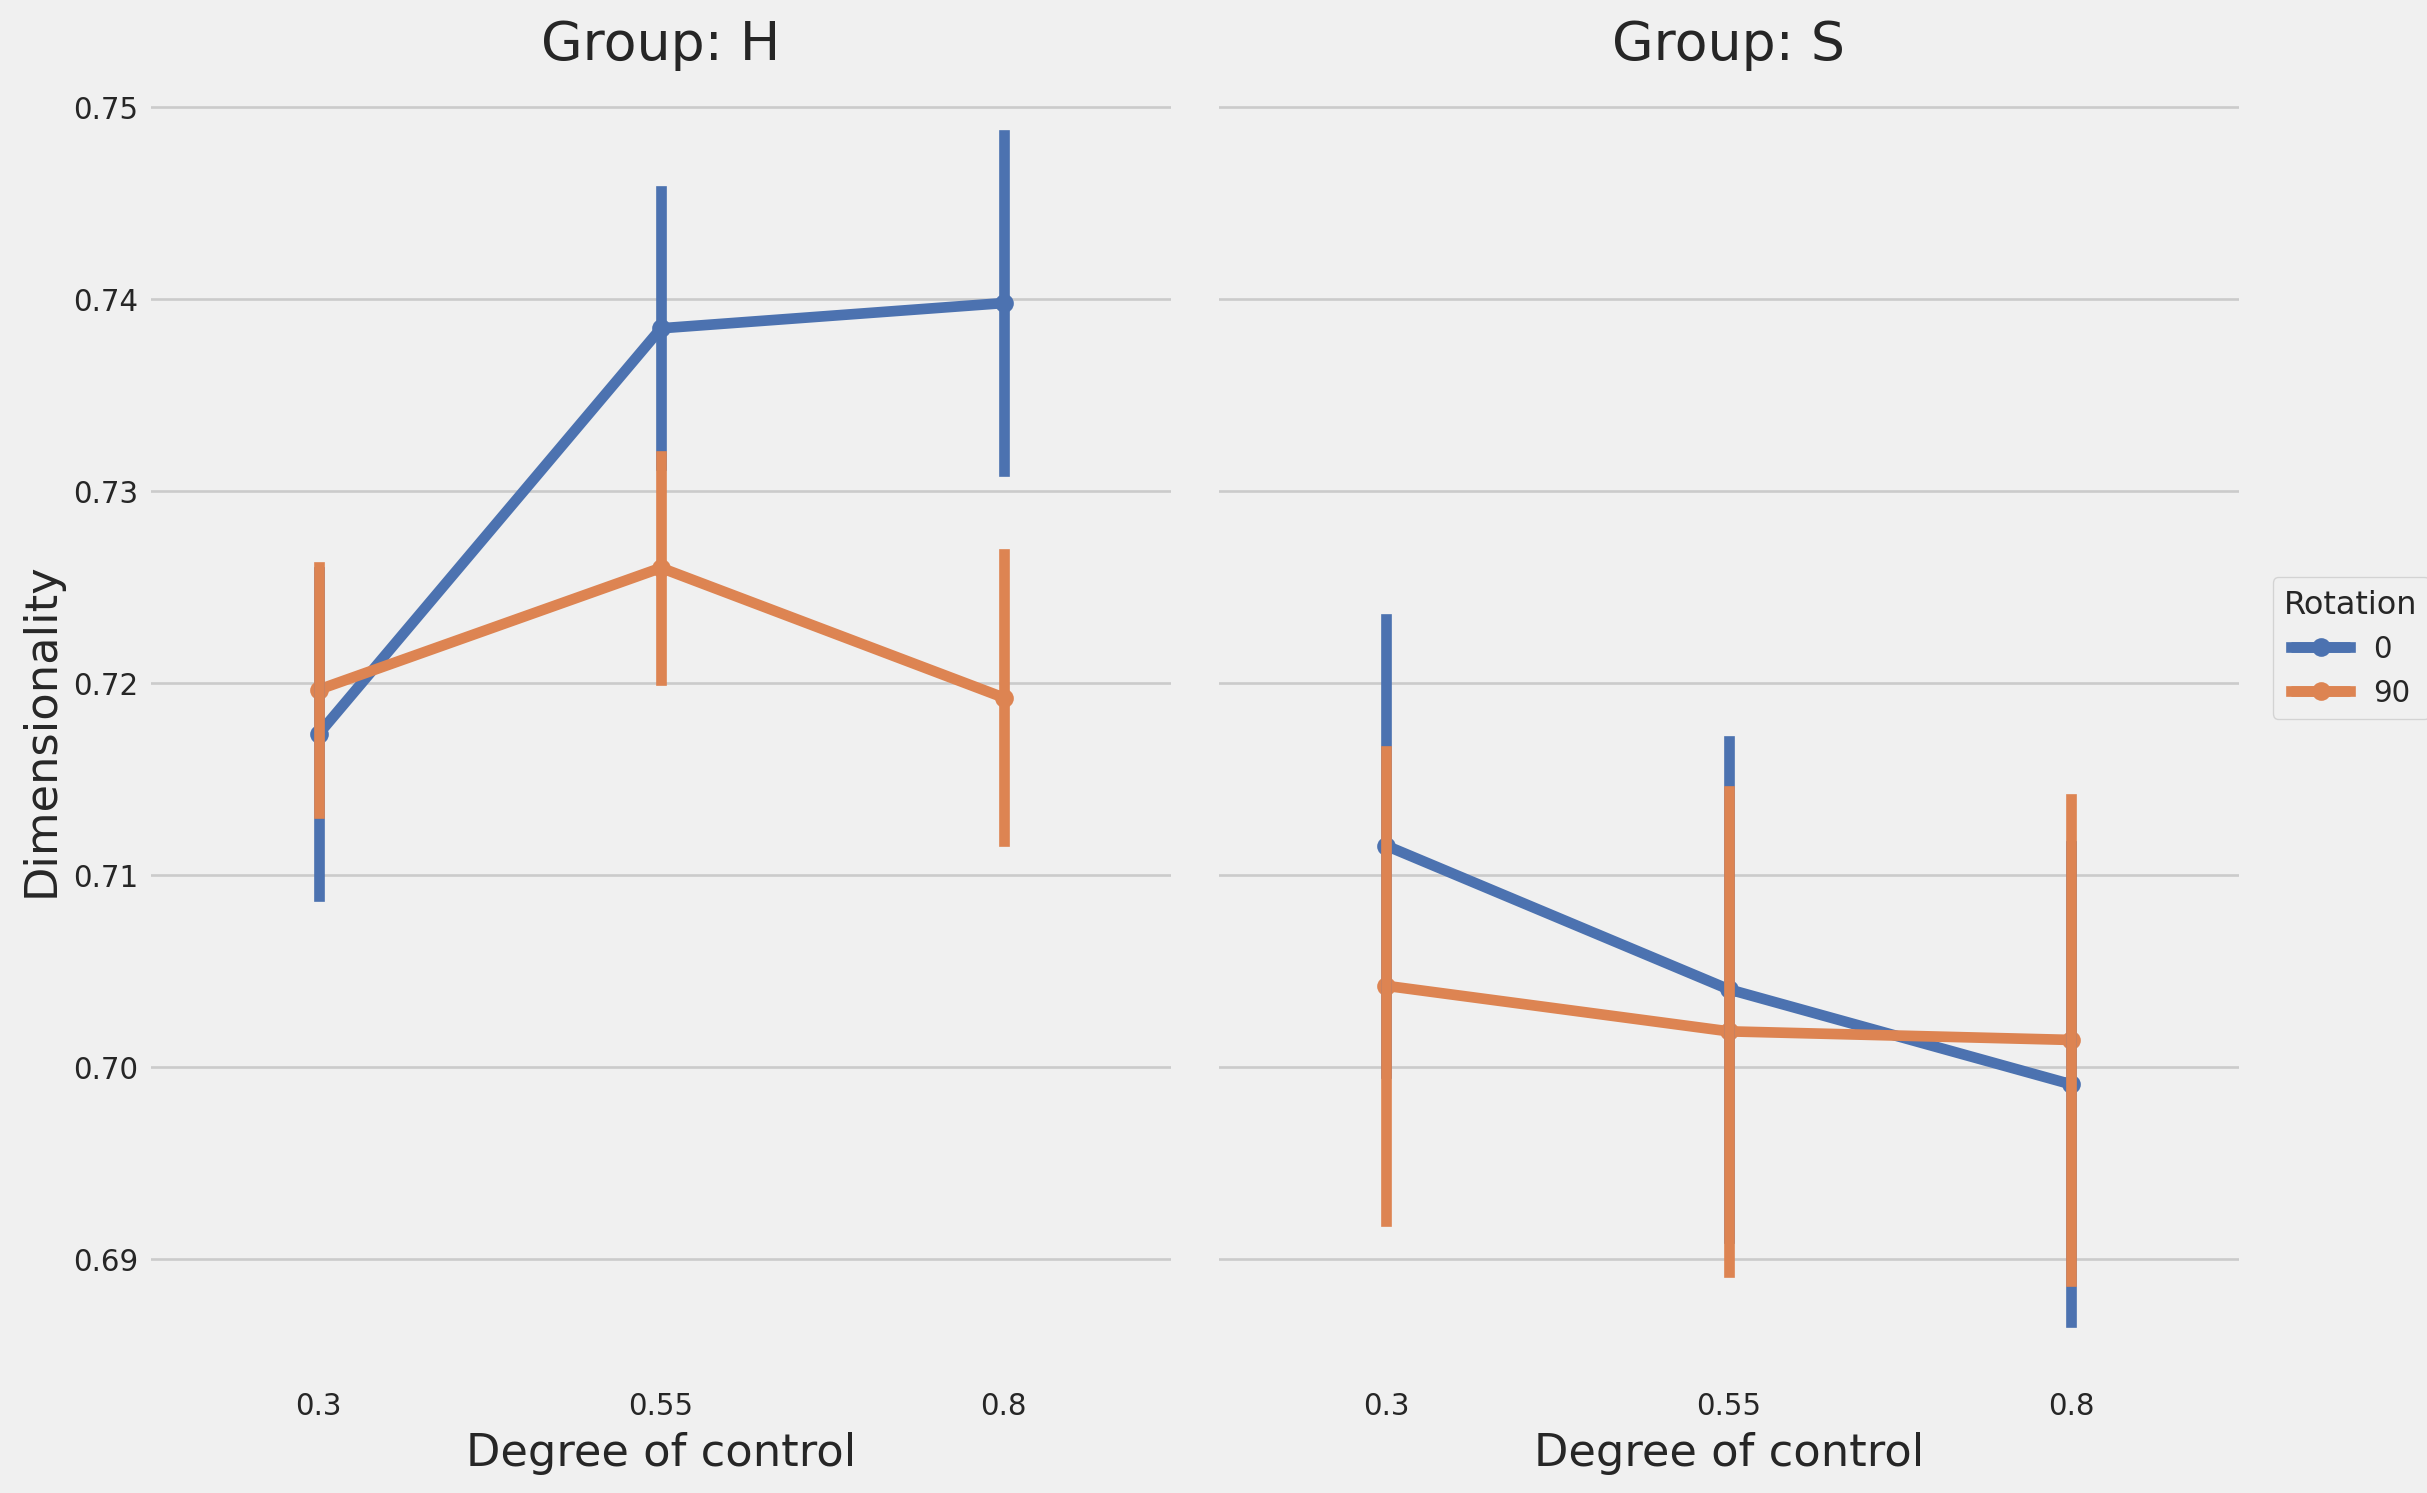

In [10]:
filepaths = utils.Save.savepath(savepath, 'dimentionality.pdf')
p.save(filepaths)